In [1]:
import numpy as np 
import pandas as pd

In [2]:
%cd /kaggle/input/food-101/

/kaggle/input/food-101


In [3]:
!head 'food-101/food-101/meta/train.txt'

apple_pie/1005649
apple_pie/1014775
apple_pie/1026328
apple_pie/1028787
apple_pie/1043283
apple_pie/1050519
apple_pie/1057749
apple_pie/1057810
apple_pie/1072416
apple_pie/1074856


In [4]:
train_df = pd.read_csv('food-101/food-101/meta/train.txt', header = None, names=['path'])
train_df.head()

,path
0,apple_pie/1005649
1,apple_pie/1014775
2,apple_pie/1026328
3,apple_pie/1028787
4,apple_pie/1043283


In [5]:
len(train_df)

75750

In [6]:
test_df = pd.read_csv('food-101/food-101/meta/test.txt', header = None, names=['path'])
test_df.head()

,path
0,apple_pie/1011328
1,apple_pie/101251
2,apple_pie/1034399
3,apple_pie/103801
4,apple_pie/1038694


In [7]:
def spliter(data, class_or_id='id'):
    if class_or_id.upper() == 'CLASS':
        output = data.split('/')[0]
        
    else:
        output = data.split('/')[-1]
    return output

In [8]:
train_df['label'] = train_df['path'].map(lambda x: spliter(data = x, class_or_id = 'Class'))

In [9]:
train_df.head()


,path,label
0,apple_pie/1005649,apple_pie
1,apple_pie/1014775,apple_pie
2,apple_pie/1026328,apple_pie
3,apple_pie/1028787,apple_pie
4,apple_pie/1043283,apple_pie


In [10]:
train_df['idx'] = train_df['path'].map(lambda x: spliter(x)) 

In [11]:
train_df.head()


,path,label,idx
0,apple_pie/1005649,apple_pie,1005649
1,apple_pie/1014775,apple_pie,1014775
2,apple_pie/1026328,apple_pie,1026328
3,apple_pie/1028787,apple_pie,1028787
4,apple_pie/1043283,apple_pie,1043283


In [12]:
test_df['label'] = test_df['path'].map(lambda x: spliter(x, 'class')) 
test_df['idx'] = test_df['path'].map(lambda x: spliter(x)) 

In [13]:
test_df.head()

,path,label,idx
0,apple_pie/1011328,apple_pie,1011328
1,apple_pie/101251,apple_pie,101251
2,apple_pie/1034399,apple_pie,1034399
3,apple_pie/103801,apple_pie,103801
4,apple_pie/1038694,apple_pie,1038694


In [14]:
mini_20 = train_df['label'].unique()[:20]


In [15]:
mini_20 


array(['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio',
       'beef_tartare', 'beet_salad', 'beignets', 'bibimbap',
       'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad',
       'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheesecake',
       'cheese_plate', 'chicken_curry', 'chicken_quesadilla'],
      dtype=object)

In [16]:
list_ = []
for l in mini_20:
    list_.append(l.upper())

In [17]:
mini_20 = [f.upper() for f in mini_20]


In [18]:
def prepare_data(label):
    if label.upper() in mini_20:
        return label
    else:
        return 'big_class'

In [19]:
train_df['label'] = train_df['label'].map(lambda x: prepare_data(x))
test_df['label'] = test_df['label'].map(lambda x: prepare_data(x))

In [20]:
train_df['label'].unique()


array(['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio',
       'beef_tartare', 'beet_salad', 'beignets', 'bibimbap',
       'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad',
       'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheesecake',
       'cheese_plate', 'chicken_curry', 'chicken_quesadilla', 'big_class'],
      dtype=object)

In [21]:
def add_exact_path(path):
    return 'food-101/food-101/images/'+path+'.jpg'

In [22]:
train_df['path'] = train_df[['path']].apply(add_exact_path, axis=1)
test_df['path'] = test_df[['path']].apply(add_exact_path, axis=1)

In [23]:
train_df.head()


,path,label,idx
0,food-101/food-101/images/apple_pie/1005649.jpg,apple_pie,1005649
1,food-101/food-101/images/apple_pie/1014775.jpg,apple_pie,1014775
2,food-101/food-101/images/apple_pie/1026328.jpg,apple_pie,1026328
3,food-101/food-101/images/apple_pie/1028787.jpg,apple_pie,1028787
4,food-101/food-101/images/apple_pie/1043283.jpg,apple_pie,1043283


In [24]:
from matplotlib import pyplot as plt
img = plt.imread(test_df['path'].iloc[0])
# plt.imshow(img)
img = img/255.

In [25]:
train_df.iloc[0]


path     food-101/food-101/images/apple_pie/1005649.jpg
label                                         apple_pie
idx                                             1005649
Name: 0, dtype: object

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True
    )
test_gen = ImageDataGenerator(rescale=1./255)

In [27]:
train_gen = datagen.flow_from_dataframe(dataframe = train_df, directory=None, x_col='path', y_col='label',
    weight_col=None, target_size=(256, 256), color_mode='rgb', #subset='training',
    classes=None, class_mode='categorical', batch_size=64, shuffle=True)

Found 75750 validated image filenames belonging to 21 classes.


In [28]:
test_gen = test_gen.flow_from_dataframe(dataframe = test_df, directory=None, x_col='path', y_col='label',
    weight_col=None, target_size=(256, 256), color_mode='rgb',
    classes=None, class_mode='categorical', batch_size=64, shuffle=True)

Found 25250 validated image filenames belonging to 21 classes.


In [29]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras import regularizers
from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications.xception import Xception

In [30]:
inception = Xception(weights='imagenet', include_top=False)
x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(256,activation='relu')(x)
# x = Dropout(0.4)(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.2)(x)

predictions = Dense(21, activation='softmax')(x)

model = Model(inputs=inception.input, outputs=predictions)
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

83697664/83683744 [==============================] - 1s 0us/step


/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [31]:
history = model.fit_generator(train_gen,
                    steps_per_epoch = len(train_gen) // 64,
                    epochs=100,
                    verbose=1)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
18/18 [==============================] - 41s 2s/step - loss: 1.9042 - accuracy: 0.7283
Epoch 2/100
18/18 [==============================] - 30s 2s/step - loss: 1.1645 - accuracy: 0.8030
Epoch 3/100
18/18 [==============================] - 30s 2s/step - loss: 1.0633 - accuracy: 0.8038
Epoch 4/100
18/18 [==============================] - 28s 2s/step - loss: 1.0681 - accuracy: 0.8047
Epoch 5/100
18/18 [==============================] - 28s 2s/step - loss: 0.9880 - accuracy: 0.8099
Epoch 6/100
18/18 [==============================] - 28s 2s/step - loss: 0.9716 - accuracy: 0.8116
Epoch 7/100
18/18 [==============================] - 28s 1s/step - loss: 1.0554 - accuracy: 0.7882
Epoch 8/100
18/18 [==============================] - 28s 1s/step - loss: 0.9866 - accuracy: 0.7908
Epoch 9/100
18/18 [==============================] - 27s 1s/step - loss: 0.9231 - accuracy: 0.8047
Epoch 10/100
18/18 [==============================] - 27s 1s/step - loss: 0.8674 - accuracy: 0.8160
Epoch 11/

In [32]:
results = model.evaluate(test_gen, batch_size=64)
print(results)

395/395 [==============================] - 240s 606ms/step - loss: 0.3295 - accuracy: 0.9055
[0.3294973075389862, 0.9055445790290833]


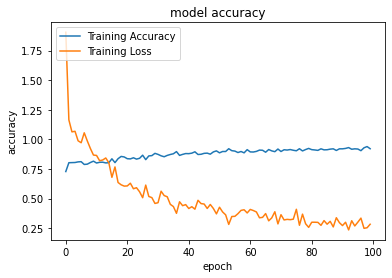

In [40]:
# Accuracy plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training Accuracy', 'Training Loss'], loc='upper left')
plt.show()

In [45]:
import os
print(os.getcwd())



/kaggle/input/food-101
